# For rent

This project is about building a model of housing prices for rent in Brazil. The model will be fed to a website that will determine housing prices under new variables, such as city and number of rooms. This system will determine whether it is worth investing in a given area or not.

This is a typical supervised learning task and a multiple regression problem, since we are given labeled training examples and the system will use multiple features to make a prediction. It is also a univariae regression problem, since we are only trying to predict a single value for each entity.

## Get the data

The dataset is from a kaggle competition available at https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

The zip file comes with two csv files. We are going to use the file `houses_to_rent_v2.csv` which is the latest dataset version

In [22]:
# TODO: download data from kaggle using kaggle API

import os
from zipfile import ZipFile
import urllib.request

DOWNLOAD_ROOT = "https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent/download"
HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(housing_url=DOWNLOAD_ROOT, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    zip_path = os.path.join(housing_path, "housing.zip")
    urllib.request.urlretrieve(housing_url, zip_path)
    
    #with ZipFile(zip_path, 'r') as zipObj:
    #    zipObj.extractall(housing_path)

In [23]:
#fetch_housing_data()

In [27]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing/houses_to_rent_v2.csv")
    return pd.read_csv(csv_path)

In [28]:
housing = load_housing_data()
housing.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Each row represents one house. There are 10,692 instances in the dataset and 13 attibutes (city, area, rooms, bathroom, parking spaces, floor, animal, furniture, hoa, rent amount, property tax, fire insurance, total). It is important to notice that there are no attribute missing values.

There are some categorical attributes, let's take a look at them

In [30]:
housing["city"].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

The dataset features 5 cities

In [31]:
housing["animal"].value_counts()

acept        8316
not acept    2376
Name: animal, dtype: int64

Most of the houses accept animals

In [32]:
housing["furniture"].value_counts()

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

And most of the house don't have furniture

Now, let's look at the other fields

In [33]:
housing.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


And now plot a histogram of all dataset

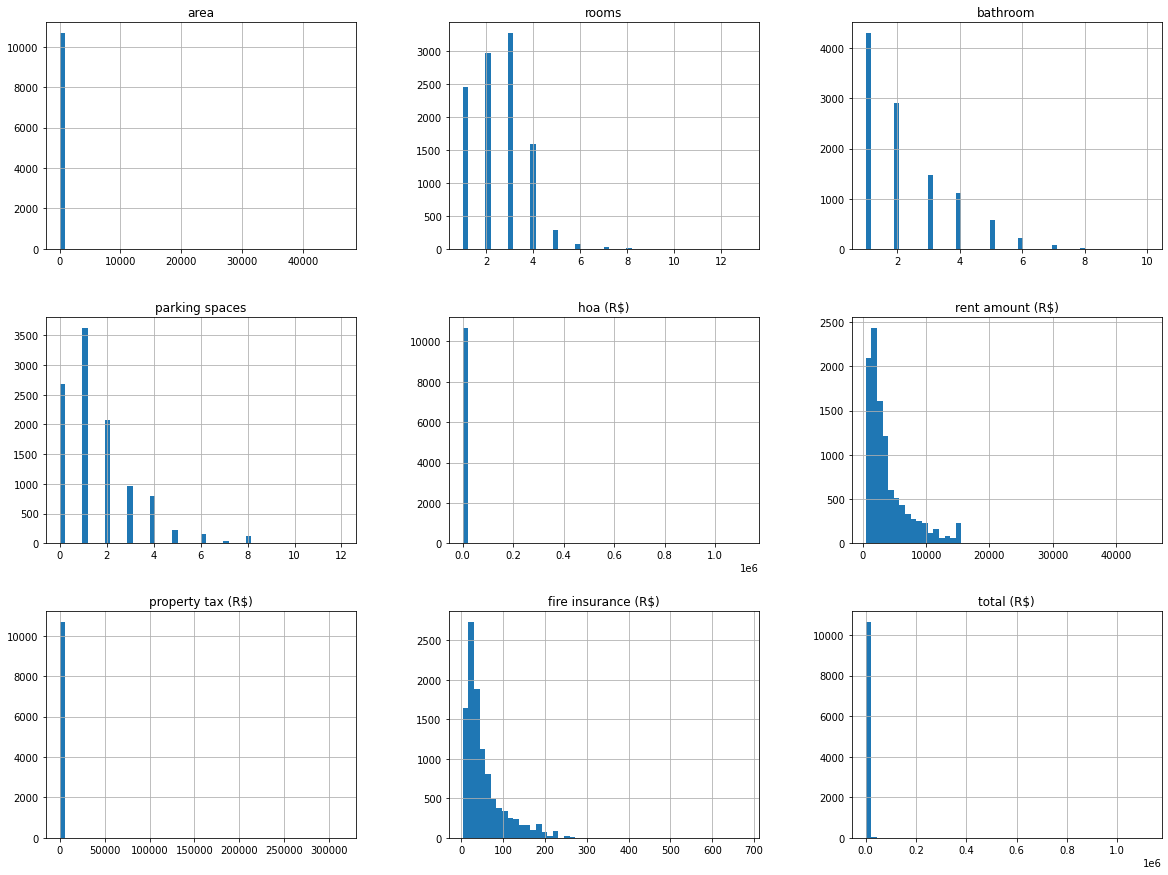

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

Some insights:
* area, hoa, property tax and total histograms are a bit strange, that's probably bacause of outliers values
* these attributes have very different scales
* 